%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


(-0.5, 0.5)

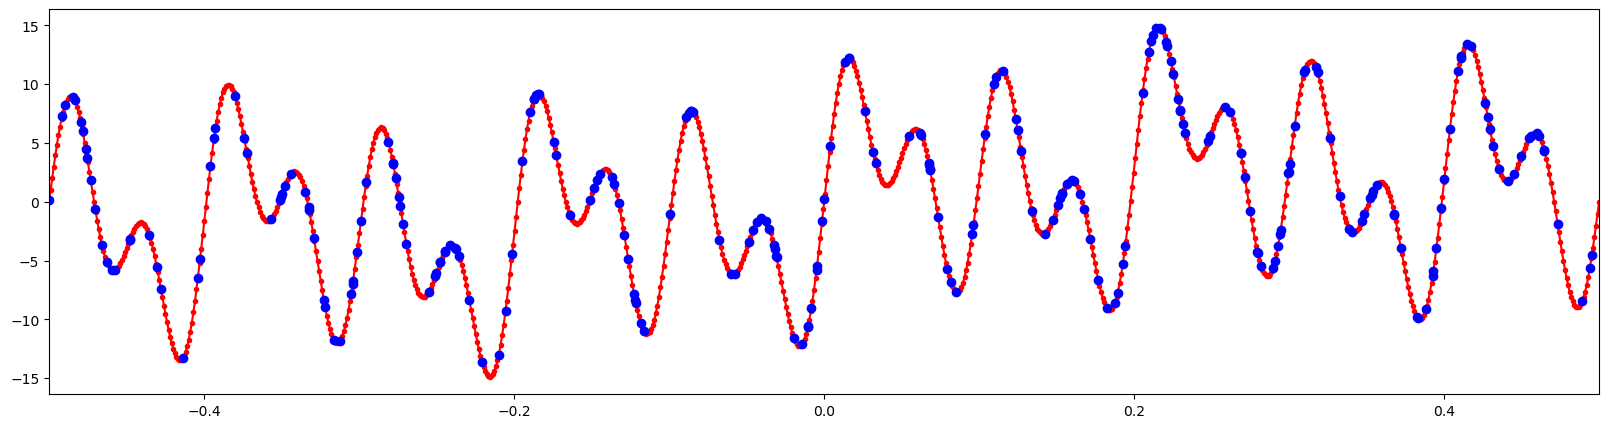

In [5]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(12345)

%pylab inline --no-import-all

# function we want to reconstruct
k=[1,5,10,20] # modulating coefficients
a=[3,3,6,6]
def myf(x,k): 
    return sum(a0*np.sin(x*k0*(2*np.pi)) for (k0, a0) in zip(k,a))

x=np.linspace(-0.5,0.5,1000)   # 'continuous' time/spatial domain; -0.5<x<+0.5
y=myf(x,k)                     # 'true' underlying trigonometric function

fig=plt.figure(1,(20,5))
ax =fig.add_subplot(111)

ax.plot(x,y,'red')
ax.plot(x,y,'r.')

                        # we should sample at a rate of >2*~max(k)
M=256                   # number of nodes
N=128                   # number of Fourier coefficients

nodes =np.random.rand(M)-0.5 # non-uniform oversampling
values=myf(nodes,k)     # nodes&values will be used below to reconstruct 
                        # original function using the Solver

ax.plot(nodes,values,'bo')

ax.set_xlim(-0.5,+0.5)

In [6]:
import numpy as np
from pynfft import NFFT, Solver

f     = np.empty(M,     dtype=np.complex128)
f_hat = np.empty([N,N], dtype=np.complex128)

this_nfft = NFFT(N=[N,N], M=M)
this_nfft.x = np.array([[node_i,0.] for node_i in nodes])
this_nfft.precompute()

this_nfft.f = f
ret2=this_nfft.adjoint()

print(this_nfft.M)  # number of nodes, complex typed
print(this_nfft.N)  # number of Fourier coefficients, complex typed
#print this_nfft.x # nodes in [-0.5, 0.5), float typed


this_solver = Solver(this_nfft)
this_solver.y = values          # '''right hand side, samples.'''

#this_solver.f_hat_iter = f_hat # assign arbitrary initial solution guess, default is 0

this_solver.before_loop()       # initialize solver internals

256
(128, 128)


In [7]:
while not np.all(this_solver.r_iter < 1e-2):
    this_solver.loop_one_step()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


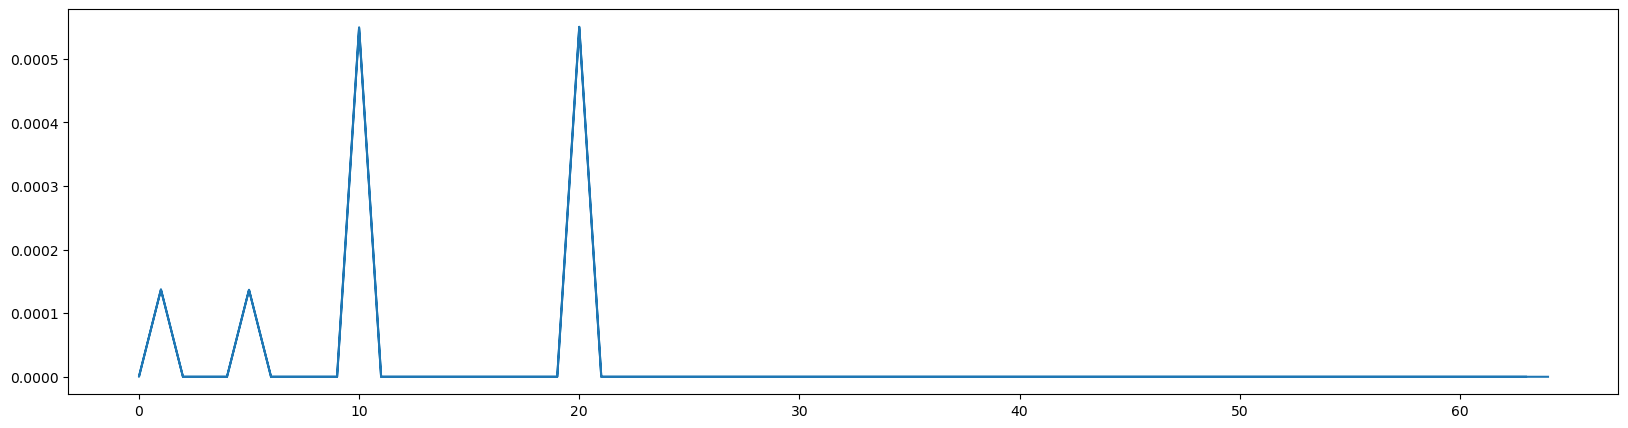

In [8]:
%pylab inline --no-import-all

import matplotlib.pyplot as plt

fig=plt.figure(1,(20,5))
ax =fig.add_subplot(111)


foo=[ np.abs( this_solver.f_hat_iter[i][0])**2 for i in range(len(this_solver.f_hat_iter) ) ]

ax.plot(np.abs(np.arange(-N/2,+N/2,1)),foo)